In [2]:
import yfinance as yf
import datetime as dt
import pandas as pd

In [9]:
data = yf.download('USDINR=X', start=dt.date.today()-dt.timedelta(days=10*365), end=dt.date.today()+dt.timedelta(days=1))
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-06-14,57.998001,57.998001,57.400002,57.998001,57.998001,0
2013-06-17,57.498001,58.013000,57.498001,57.498001,57.498001,0
2013-06-18,58.103001,58.877998,58.002998,58.103001,58.103001,0
2013-06-19,58.838001,58.889999,58.618000,58.838001,58.838001,0
2013-06-20,58.713001,59.958000,58.713001,58.713001,58.713001,0
...,...,...,...,...,...,...
2023-06-06,82.511200,82.648003,82.476501,82.511200,82.511200,0
2023-06-07,82.517197,82.622398,82.467003,82.517197,82.517197,0
2023-06-08,82.618103,82.646797,82.469002,82.618103,82.618103,0


In [10]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-06-14,57.998001,57.998001,57.400002,57.998001,57.998001,0
2013-06-17,57.498001,58.013000,57.498001,57.498001,57.498001,0
2013-06-18,58.103001,58.877998,58.002998,58.103001,58.103001,0
2013-06-19,58.838001,58.889999,58.618000,58.838001,58.838001,0
2013-06-20,58.713001,59.958000,58.713001,58.713001,58.713001,0
2013-06-21,59.568001,59.752998,59.147999,59.568001,59.568001,0
2013-06-24,59.268002,59.810001,59.268002,59.268002,59.268002,0
2013-06-25,59.807999,59.807999,59.432999,59.807999,59.807999,0
2013-06-26,59.658001,60.748001,59.603001,59.658001,59.658001,0


<Axes: ylabel='Density'>

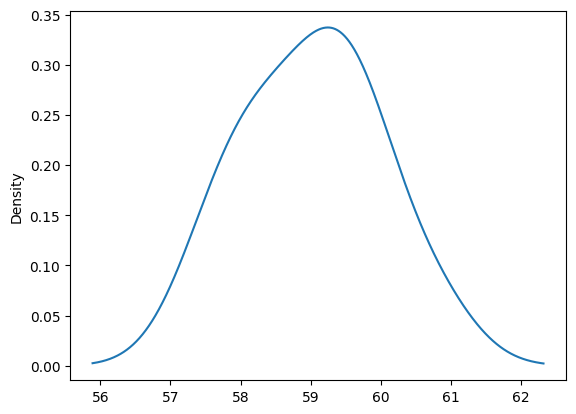

In [11]:
data.head(10).Close.plot(kind='kde')

In [18]:
import pandas as pd

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

new_data = pd.DataFrame(data, date_parser=dateparse).fillna(0)

TypeError: DataFrame.__init__() got an unexpected keyword argument 'date_parser'

In [16]:
new_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-06-14,57.998001,57.998001,57.400002,57.998001,57.998001,0
2013-06-17,57.498001,58.013000,57.498001,57.498001,57.498001,0
2013-06-18,58.103001,58.877998,58.002998,58.103001,58.103001,0
2013-06-19,58.838001,58.889999,58.618000,58.838001,58.838001,0
2013-06-20,58.713001,59.958000,58.713001,58.713001,58.713001,0
...,...,...,...,...,...,...
2023-06-06,82.511200,82.648003,82.476501,82.511200,82.511200,0
2023-06-07,82.517197,82.622398,82.467003,82.517197,82.517197,0
2023-06-08,82.618103,82.646797,82.469002,82.618103,82.618103,0


In [19]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

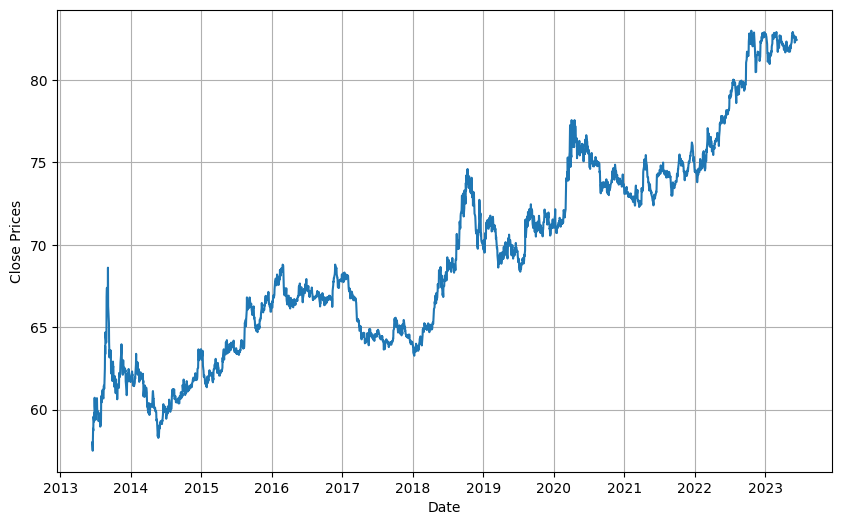

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
fig = plt.plot(data['Close'])
plt.show()

<Axes: ylabel='Density'>

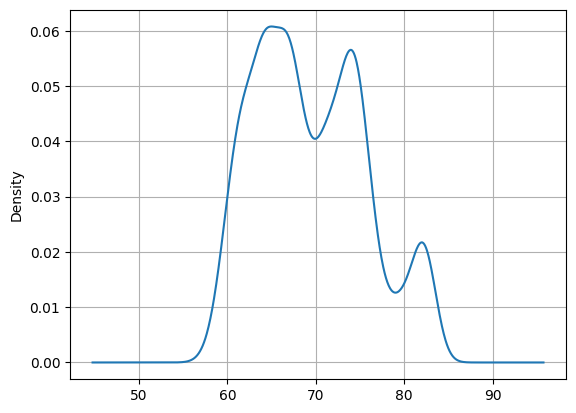

In [30]:
df_close = data['Close']
df_close.plot(kind='kde', grid=True)

In [33]:
fig

In [1]:
# !pip install pmdarima
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
import datetime as dt


stock_data = yf.download('USDINR=X', start=dt.date.today()-dt.timedelta(days=10*365), end=dt.date.today()+dt.timedelta(days=1))

stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-06-17,57.498001,58.013000,57.498001,57.498001,57.498001,0
2013-06-18,58.103001,58.877998,58.002998,58.103001,58.103001,0
2013-06-19,58.838001,58.889999,58.618000,58.838001,58.838001,0
2013-06-20,58.713001,59.958000,58.713001,58.713001,58.713001,0
2013-06-21,59.568001,59.752998,59.147999,59.568001,59.568001,0
...,...,...,...,...,...,...
2023-06-08,82.618103,82.646797,82.469002,82.618103,82.618103,0
2023-06-09,82.488297,82.520798,82.413002,82.488297,82.488297,0
2023-06-12,82.444801,82.555298,82.385399,82.444801,82.444801,0


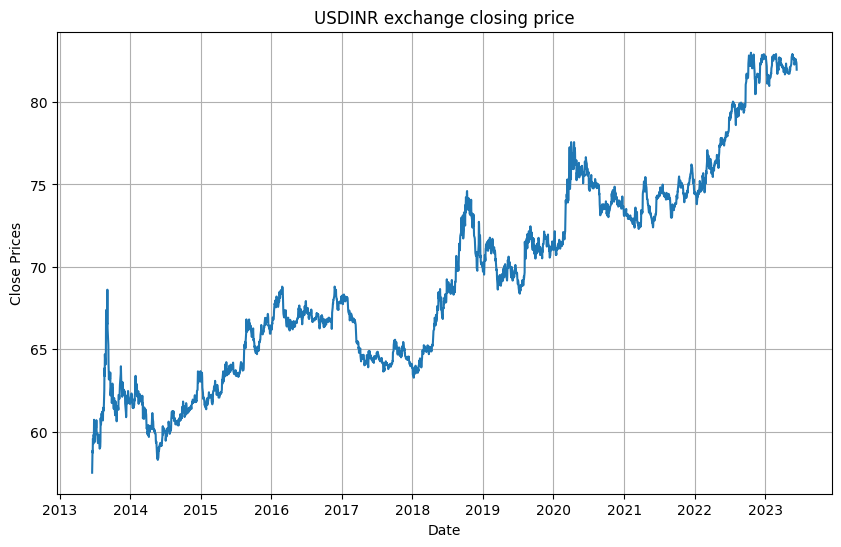

In [2]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('USDINR exchange closing price')
plt.show()

<Axes: ylabel='Density'>

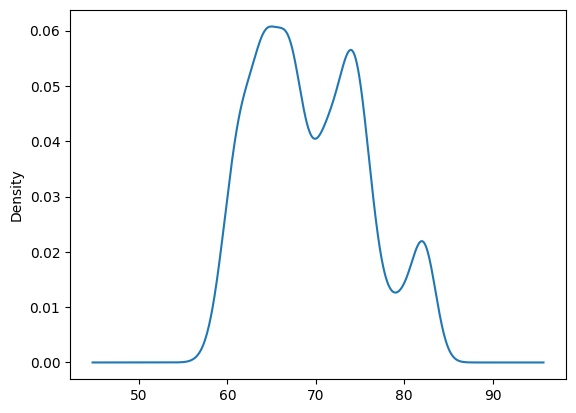

In [3]:
df_close = stock_data['Close']
df_close.plot(kind='kde')

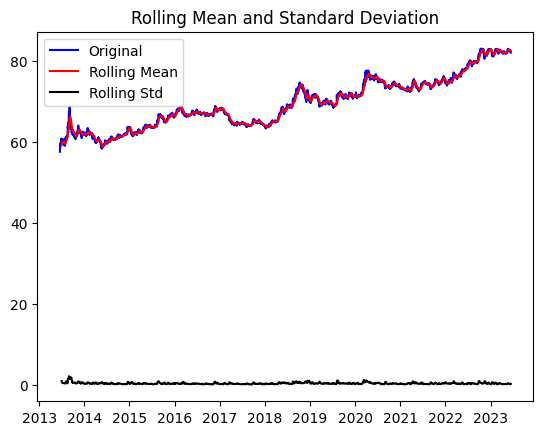

Results of dickey fuller test
Test Statistics                  -0.755825
p-value                           0.831755
No. of lags used                  5.000000
Number of observations used    2598.000000
critical value (1%)              -3.432870
critical value (5%)              -2.862653
critical value (10%)             -2.567363
dtype: float64


In [4]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 640x480 with 0 Axes>

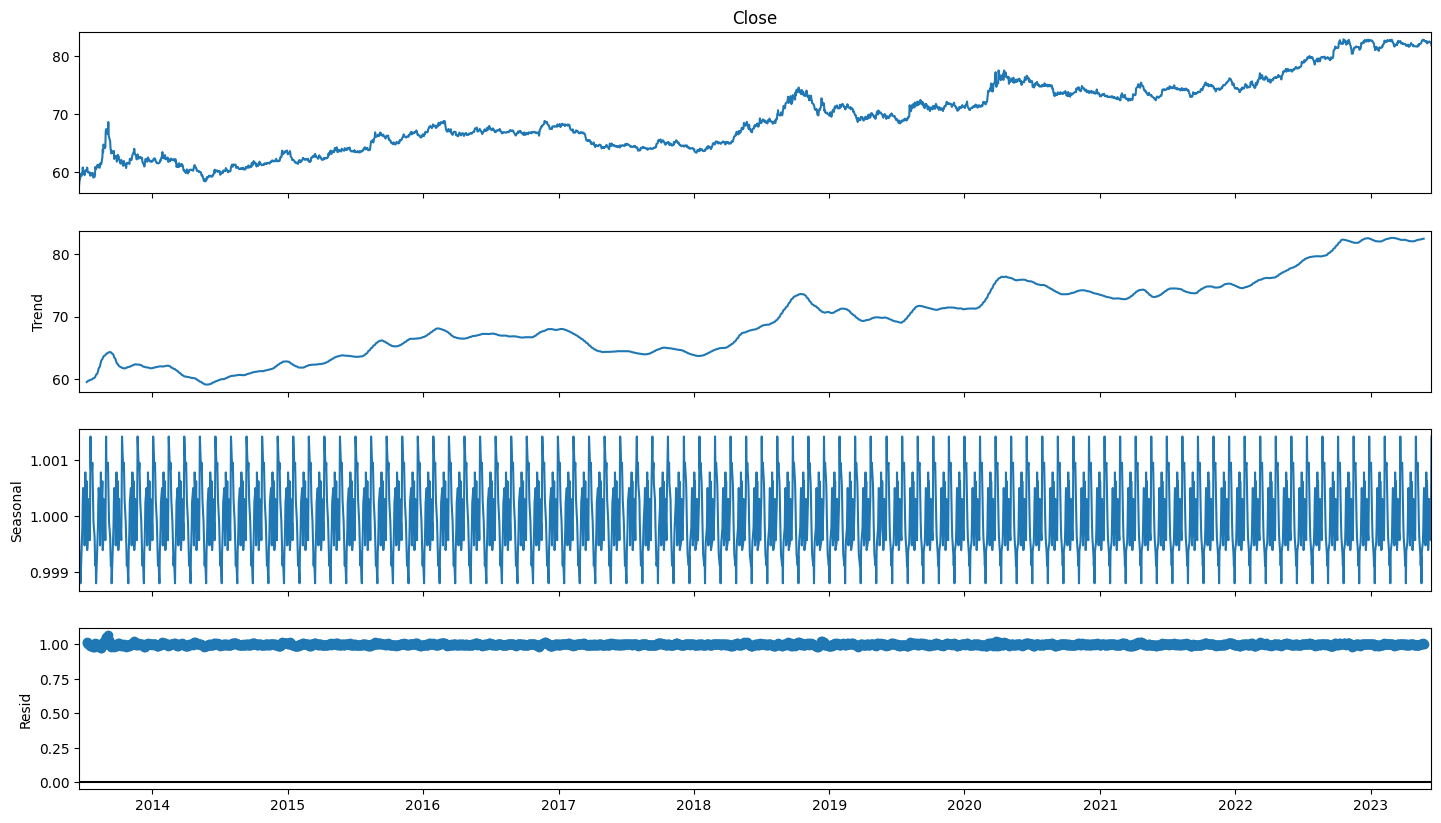

In [8]:
# To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


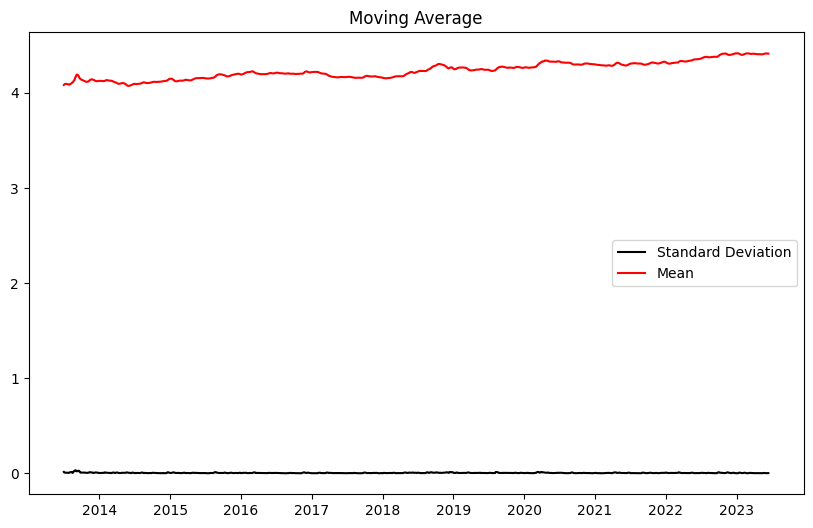

In [9]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

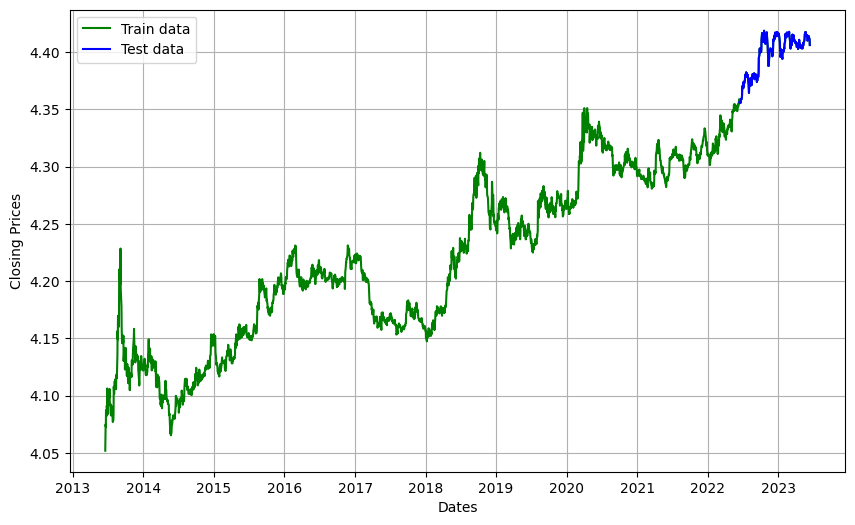

In [10]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13379.886, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-18632.697, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-18175.702, Time=0.80 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-18613.098, Time=0.96 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-18638.517, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-8583.354, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-18636.543, Time=0.46 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-18638.140, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5562.2

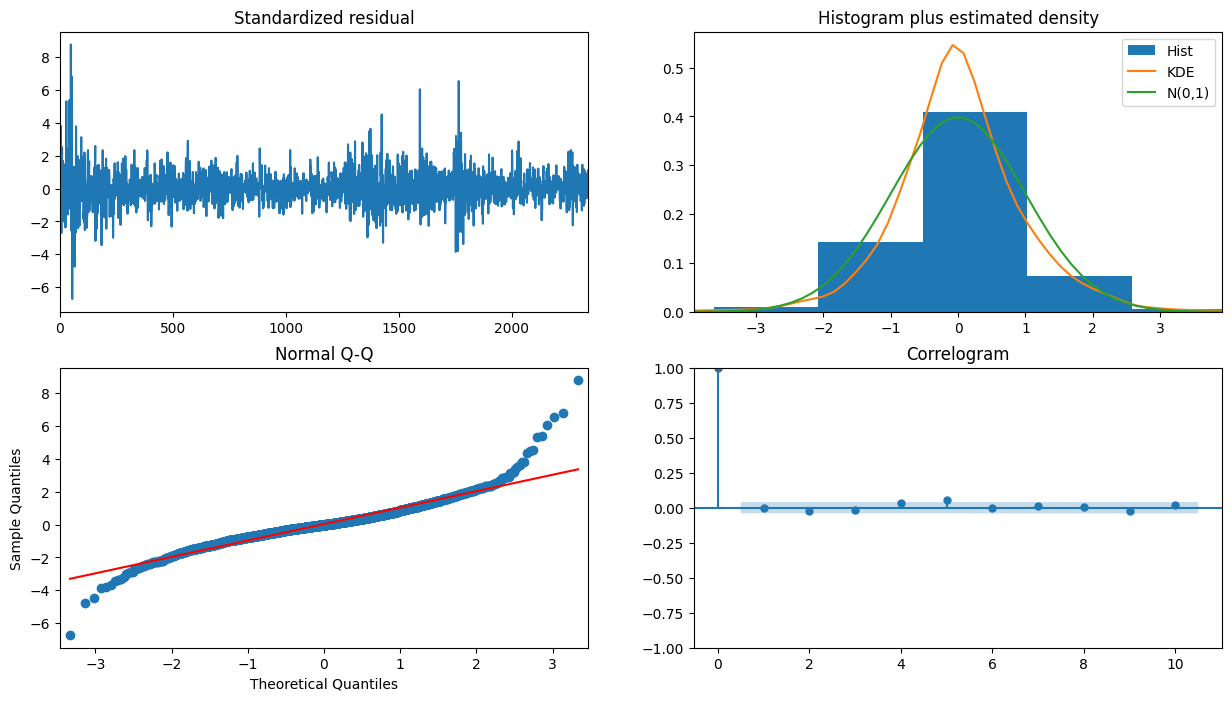

In [11]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2340
Model:                 ARIMA(1, 1, 2)   Log Likelihood                9305.266
Date:                Wed, 14 Jun 2023   AIC                         -18602.533
Time:                        20:16:31   BIC                         -18579.503
Sample:                             0   HQIC                        -18594.144
                               - 2340                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9529      0.007    131.036      0.000       0.939       0.967
ma.L1         -1.0966      0.016    -68.345      0.000      -1.128      -1.065
ma.L2          0.1113      0.014      7.868      0.0

In [17]:
# Forecast
fc = fitted.forecast(321, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


NameError: name 'conf' is not defined

In [18]:
fitted.forecast(321, alpha=0.05)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2340    4.357902
2341    4.357208
2342    4.356546
2343    4.355916
2344    4.355315
          ...   
2656    4.343154
2657    4.343154
2658    4.343154
2659    4.343154
2660    4.343154
Name: predicted_mean, Length: 321, dtype: float64

In [19]:
fc_series = pd.Series(fc, index=test_data.index)

In [20]:
fc_series

Date
2022-06-15   NaN
2022-06-16   NaN
2022-06-17   NaN
2022-06-20   NaN
2022-06-21   NaN
              ..
2023-06-08   NaN
2023-06-09   NaN
2023-06-12   NaN
2023-06-13   NaN
2023-06-14   NaN
Name: predicted_mean, Length: 261, dtype: float64